# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:


TOKEN_SPAM_PROB_FILE= 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE= 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE= 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX='SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE='SpamData/03_Testing/test-target.txt'

VOCAB_SIZE=2500

# Loads the Data

In [3]:
# Features
X_test= np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test=np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# token Probablities
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [57]:
X_test[:5]


array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculate the Joint Probability
### The Dot Product

In [5]:
a= np.array([1,2,3])
b= np.array([0,5,4])
print('a= ',a)
print('b= ',b)

a=  [1 2 3]
b=  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 +3*4

22

In [8]:
c= np.array([[0,6],[3,0],[5,1]])
print('shape of c is ',c.shape)
print(c)

shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print(' Shape of dot product is ',a.dot(c).shape)

[21  9]
 Shape of dot product is  (2,)


**Dimension of dot product of X_test and and prob_token_spam-**

In [10]:
X_test.shape

(1724, 2500)

In [11]:
prob_token_spam.shape

(2500,)

In [12]:
print('Shape of X_test and prob_token_spam ',X_test.dot(prob_token_spam).shape)

Shape of X_test and prob_token_spam  (1724,)


## Set the Prior 
$$P(Spam \, | \, X) = \frac { P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [13]:
PROB_SPAM=0.3116

**Working with log Probabilities because values are too small and log will spread and make graph and plot more visible       and done less calculation (instead of multipication and division in log value addition and substraction)**

In [14]:
np.log(prob_token_spam)

array([ -4.42114576,  -5.26523334,  -5.00024268, ...,  -8.9713546 ,
       -11.41370164,  -8.9713546 ])

## Joint Probability in log format

In [15]:
joint_log_spam= X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens))+np.log(PROB_SPAM)

In [16]:
joint_log_spam[:15]

array([  22.40835074,    1.97628629,   17.82517227,   16.79175377,
         19.58882   ,  -13.0740086 ,   26.58415697,    1.97628629,
         13.49474962, -121.29676806,   19.49694391,   26.81664437,
         20.00154858,    1.97628629,   13.1444919 ])

$$P(Ham \, | \, X) = \frac { P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [17]:
joint_log_ham= X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens))+np.log(1-PROB_SPAM)

In [18]:
joint_log_ham[:5]

array([-58.98081793, -10.86376893, -34.76472373, -58.57982422,
       -53.1220009 ])

In [19]:
joint_log_spam.shape

(1724,)

# Making Prediction 
### Checking for higher joint probability
$$ P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>OR</center>
<br>
$$ P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

 #### Vector of Prediction 
For Spam email value 1(true) and for nonspam value 0(False).

In [20]:
prediction=joint_log_spam>joint_log_ham

In [21]:
prediction[:5]*1

array([1, 1, 1, 1, 1])

In [22]:
y_test[:5]

array([1., 1., 1., 1., 1.])

### Simplify
$$ P(X \, | \, Spam) \, P(Spam) != \frac { P(X \, | \, Spam) \, P(Spam)} {P(X)}$$ 

In [23]:
joint_log_spam= X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham= X_test.dot(np.log(prob_token_ham))+np.log(1-PROB_SPAM)

In [24]:
prediction=joint_log_spam>joint_log_ham

In [53]:
prediction[:5]*1

array([1, 1, 1, 1, 1])

In [54]:
y_test[:5]

array([1., 1., 1., 1., 1.])

# Metrics and Evaluation
## Accuracy

In [27]:
correct_docs= (y_test==prediction).sum()
print('Documents classified correctly',correct_docs)
numdocs_wrong= X_test.shape[0]-correct_docs
print('Documents classified incorrectly',numdocs_wrong)
print('% classified wrongly {:.2%}'.format((numdocs_wrong/len(X_test))))
print('Accuracy of model is {:.2%}'.format((correct_docs/len(X_test))))

Documents classified correctly 1685
Documents classified incorrectly 39
% classified wrongly 2.26%
Accuracy of model is 97.74%


# Visualising our Result

In [28]:
## Chart Styling info
yaxis_label='P(X | Spam)'
xaxis_label='P(X | Nonspam)'

linedata= np.linspace(start=-14000, stop=1,num=1000)

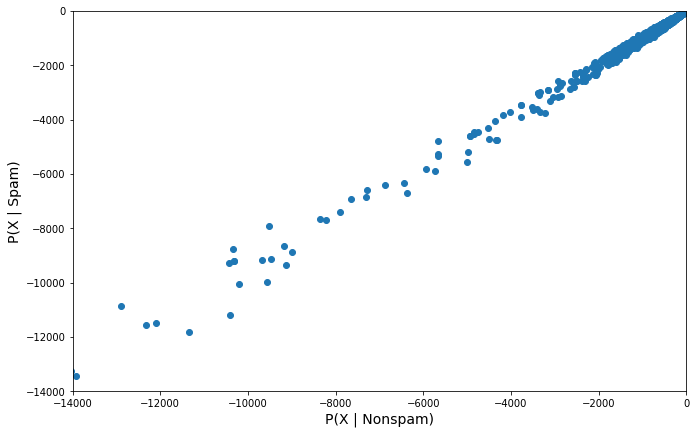

In [29]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

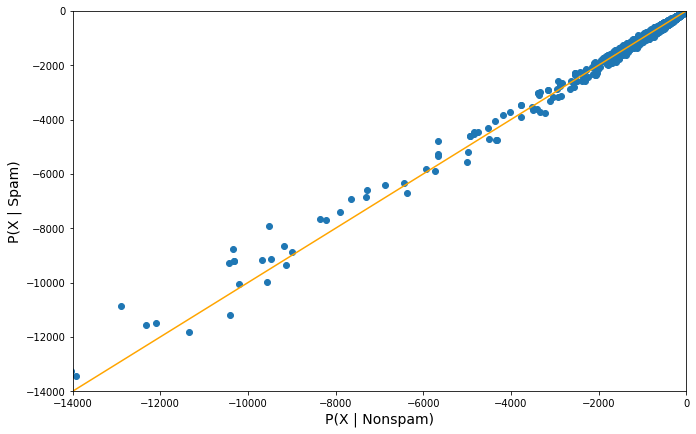

In [30]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam)
plt.plot(linedata,linedata,color='orange')
plt.show()

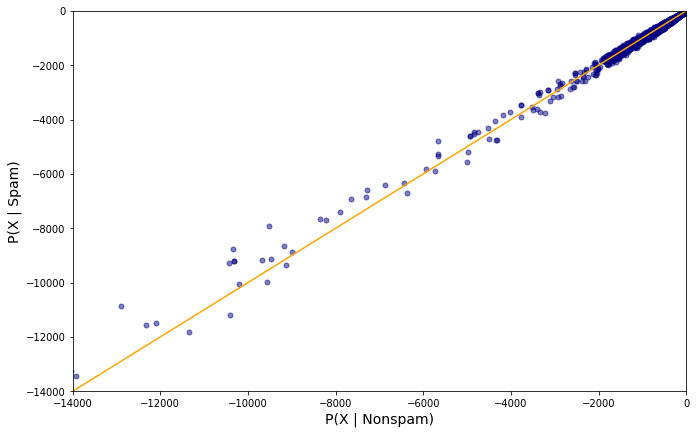

In [31]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata,linedata,color='orange')
plt.show()

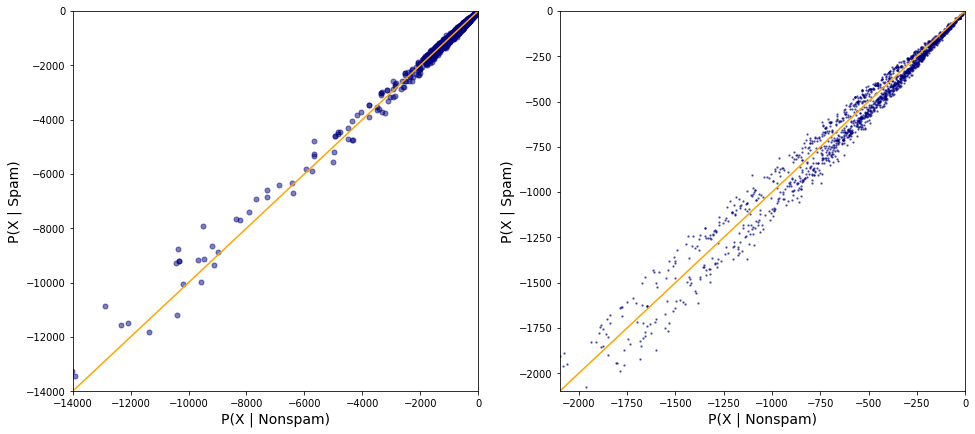

In [32]:
plt.figure(figsize=(16,7))

# Chart Number 1
# argument = row , column, index
plt.subplot(1,2,1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)


#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata,linedata,color='orange')

# Chart Number 2
# argument = row , column, index
plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-2100,1])
plt.ylim([-2100,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=2)
plt.plot(linedata,linedata,color='orange')
plt.show()

In [33]:
# Chart Styling
sns.set_style('whitegrid')
labels= 'Actual Category'
summary_df=pd.DataFrame({yaxis_label:joint_log_spam, xaxis_label:joint_log_ham, labels:y_test})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


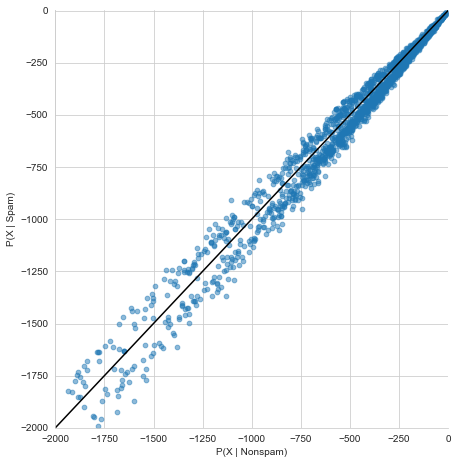

In [34]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, scatter_kws={'alpha': 0.5, 's':22})

plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata, linedata, color='black')
plt.show()

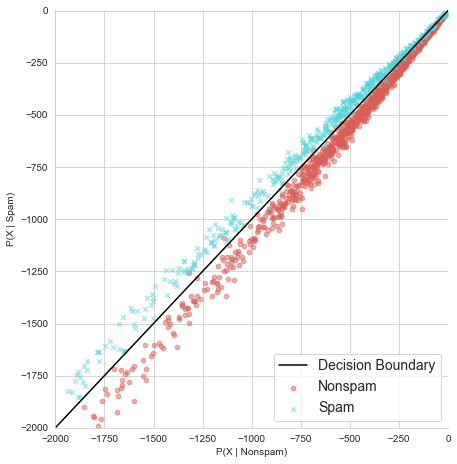

In [35]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.5, 's':22}, hue=labels, markers=['o','x'], palette='hls')

plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)
plt.show()

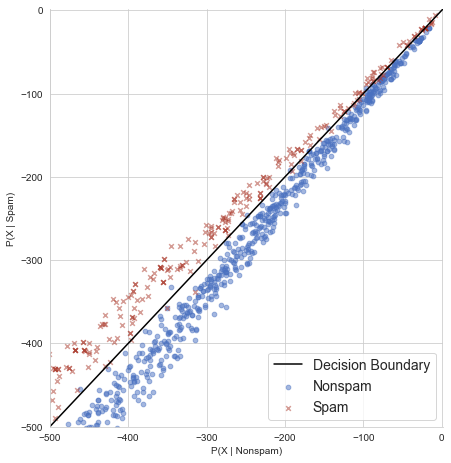

In [36]:
# using our custom pallete
my_colors=['#4A71C0' , '#AB3A2C' ]
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.5, 's':22}, hue=labels, markers=['o','x'], palette=my_colors)

plt.xlim([-500,1])
plt.ylim([-500,1])
plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)
plt.show()

## False Positive and False Negative

In [37]:
#False Positive -Actually email non spam  and classify as spam
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [38]:
true_pos= (y_test==1) & (prediction == 1)
true_pos.sum()

568

In [39]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [40]:
false_pos= (y_test == 0) & (prediction == 1)
false_pos.sum()

18

In [41]:
false_neg= (y_test == 1) & (prediction == 0)
false_neg.sum()

21

# Recall Score

In [42]:
recall_score= true_pos.sum()/( true_pos.sum()+false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 96.43%


# Precision Score

In [43]:
precision_score= true_pos.sum()/( true_pos.sum()+false_pos.sum())
print('Precision Score is {:.2%}'.format(precision_score))

Precision Score is 96.93%


# F Score or F1 Score

In [44]:
f1_score= 2* (precision_score* recall_score)/(precision_score +recall_score)
print('F Score is {:.2%}'.format(f1_score))

F Score is 96.68%
